<div style="text-align: right"> <b> September 10, 2019</b> </div>
<b>Taylor's mechanics</b>

<b>Problem 1.50</b>

\[Computer\] The differential equation (1.51) for the skateboard of Example 1.2 cannot be solved in terms of elementary functions, but is easily solved numerically. (a) if you have access to software, such as Mathematica, Maple, or Matlab, that can solve differential equations numerically, solve the differential equation for the case that the board is released from $\phi$<sub>o</sub> = 20 degrees, using the values R = 5 m and g = 9.8 m/s<sup>2</sup>. Make a plot of $\phi$ against time for two or three periods. (b) on the same picture, plot the approximate solution (1.57) with the same $\phi$<sub>o</sub> = 20<sup>o</sup>. Comment on your two graphs. Note; If you haven't used the numerical solver before, you will need to learn the necessary syntax. For example, in Mathematica you will need to learn the syntax for "NDSolve" and how to plot the solution that it provides. This takes a bit of time, but is something that is very well worth learning.


# Solution

## Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

## Define differential equation
It needs to be setup as first order differential equations to use scipy's integrate function, so a subsititution of variable is required. To solve for theta, d_theta/dt is set to omega, so we have a set of two coupled first order differential equations.

In [2]:
def pend(y, t, b):
...     theta, omega = y
...     dydt = [omega, -b*np.sin(theta)]
...     return dydt

## Define constants

In [3]:
g = 9.8
R = 5
y0 = [np.radians(20), 0.0]

## Solve numerically for a range ot time

In [4]:
t = np.linspace(0, 20, 201)

In [5]:
numerical_sol = odeint(pend, y0, t, args=(g/R,))

## Calculate the analytical approximation solution

In [6]:
analytical_approx = y0[0]*np.cos(np.sqrt(g/R)*t)

## Plot figure

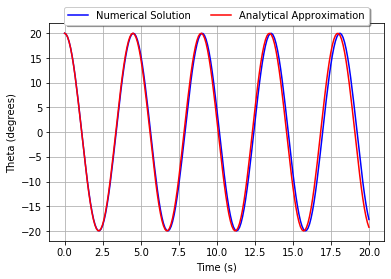

In [7]:
plt.plot(t, np.degrees(numerical_sol[:, 0]), 'b-', label='Numerical Solution')
plt.plot(t, np.degrees(analytical_approx), 'r-', label='Analytical Approximation')
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('Theta (degrees)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=3, fancybox=True, shadow=True)
plt.grid()
plt.show()